In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.shape

(1984, 5)

In [5]:
df.columns

Index(['Date', 'Oil Investments', 'Gold Investments', 'Comp Stock',
       'Other sharesInvestments'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1984 non-null   object 
 1   Oil Investments          1984 non-null   float64
 2   Gold Investments         1984 non-null   float64
 3   Comp Stock               1984 non-null   float64
 4   Other sharesInvestments  1984 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [7]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Here we are going to predict the stock and  investment of the company in 'OIL INVESTMENTS'

In [10]:
df_Oil=df[['Date','Oil Investments']]
df_Oil.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [11]:
df_Oil.set_index('Date', inplace=True)
#clubbing the data which will show the oil investment per month as at some index 
df_Oil=df_Oil.resample('MS').sum()

In [12]:
df_Oil.reset_index(inplace=True)
df_Oil.head()

,Date,Oil Investments
0,2009-12-01,0.025417
1,2010-01-01,-0.029126
2,2010-02-01,0.184326
3,2010-03-01,0.095769
4,2010-04-01,-0.067218


In [13]:
df_Oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             97 non-null     datetime64[ns]
 1   Oil Investments  97 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [14]:
df_Oil.describe()

,Oil Investments
count,97.000000
mean,-0.008899
std,0.125303
min,-0.953182
25%,-0.037497
50%,-0.000692
75%,0.045461
max,0.248424


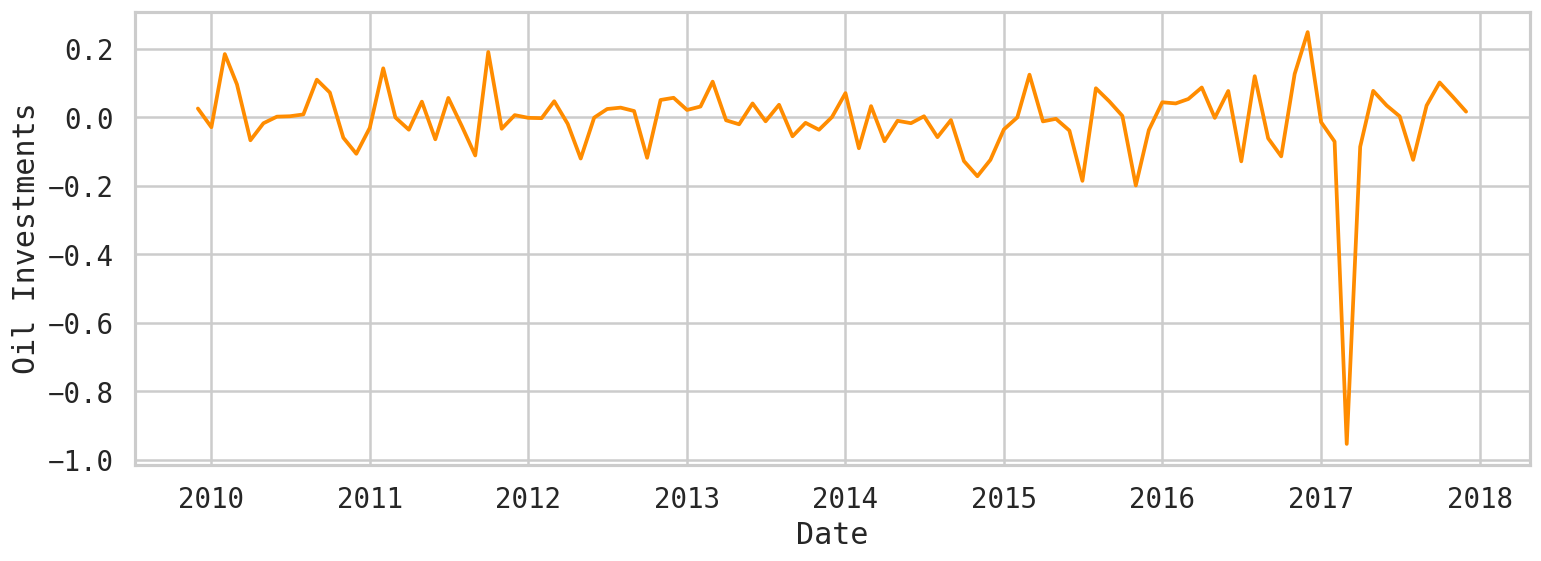

In [15]:
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(15,5),dpi=120)
sns.lineplot(x='Date',y='Oil Investments',data=df_Oil,dashes=True,markers='2',estimator=None,ci=55,err_style='band',color='darkorange')
plt.show()

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Investments):
    result=adfuller(Investments) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [17]:
#Oil Investments
adfuller_test(df_Oil['Oil Investments'])

ADF Test Statistic : -7.126902702274782
p-value : 3.6005710703274825e-10
#Lags Used : 2
Number of Observations Used : 94
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


##### Here p value is higher than 0.05 which lead to drooping null hypothesis

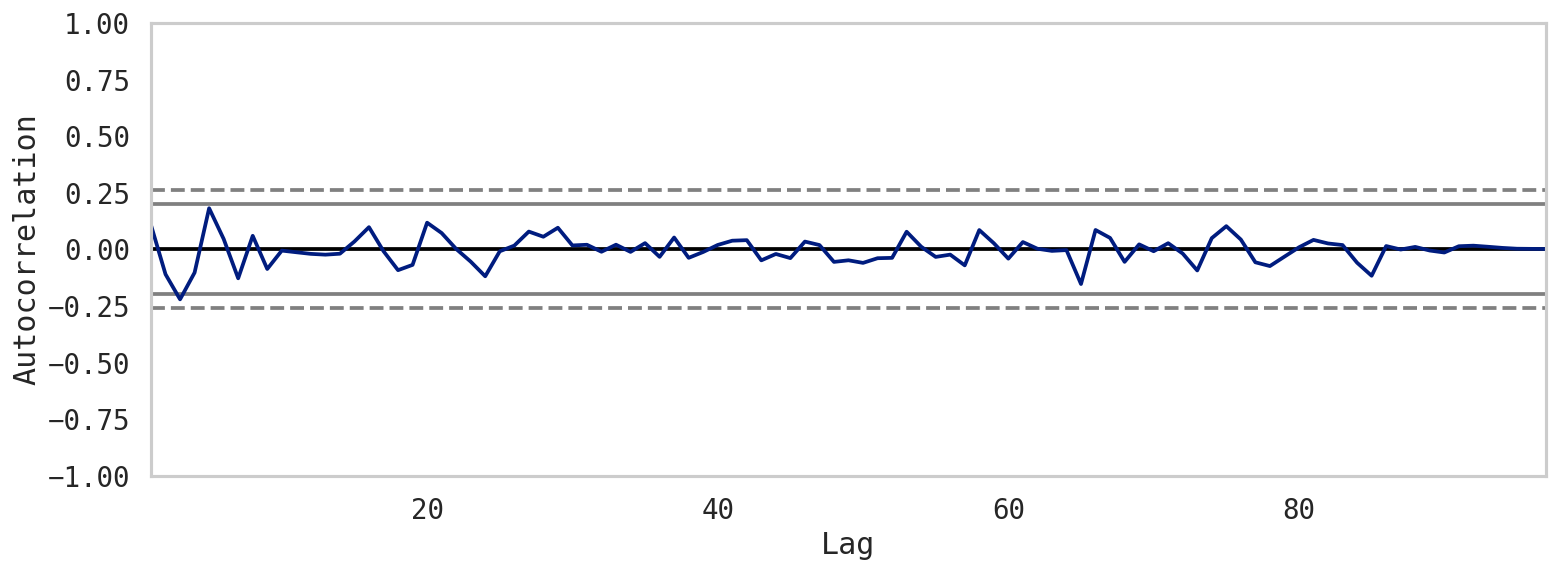

In [18]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
autocorrelation_plot(df_Oil['Oil Investments'])
plt.show()

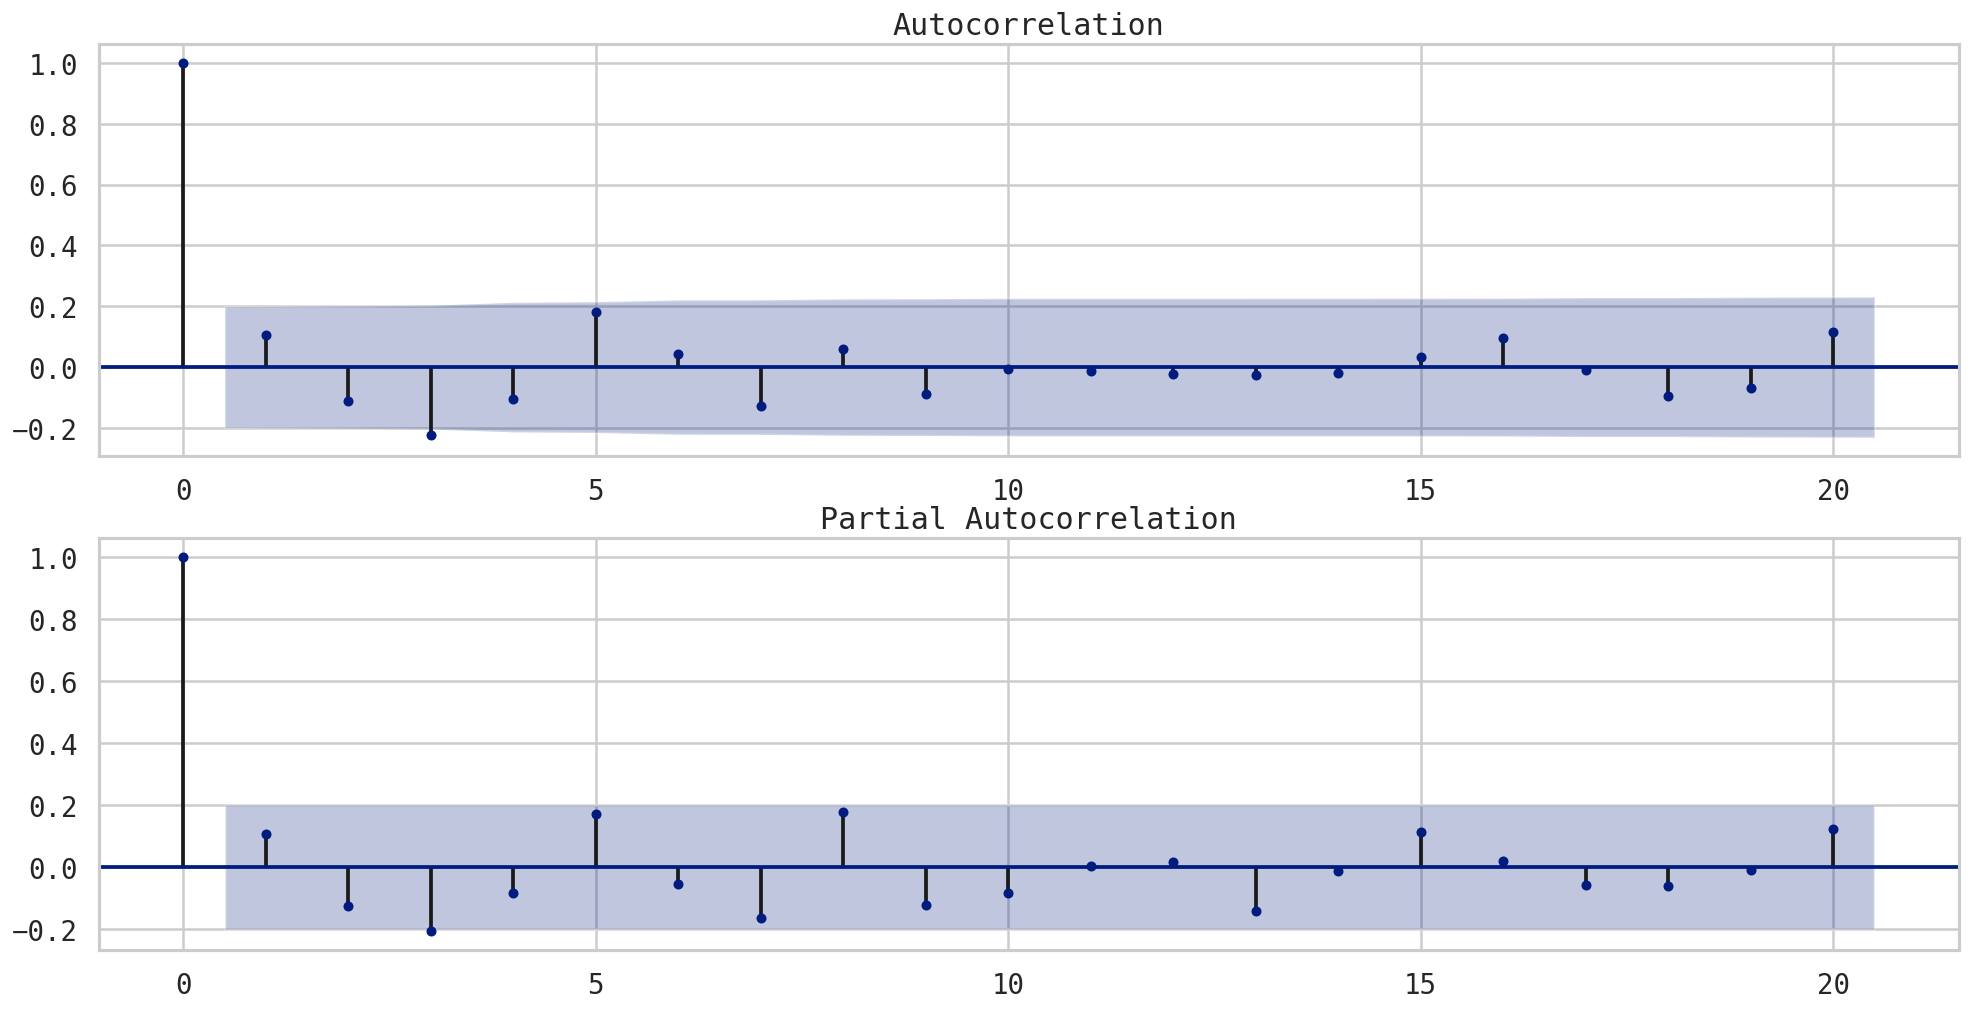

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig=plt.figure(figsize=(20,10),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_Oil['Oil Investments'],lags=20,ax=ax1)   #to determine AR value
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(df_Oil['Oil Investments'],lags=20,ax=ax2) # to determine MA value
plt.tight_layout
plt.show()

In [20]:
model=sm.tsa.statespace.SARIMAX(df_Oil['Oil Investments'],order=(5,1,8),seasonal_order=(5,1,8,12))
results=model.fit()

In [21]:
df_Oil['forecast']=results.predict(start=50,end=97,dynamic=True)
df_Oil

,Date,Oil Investments,forecast
0,2009-12-01,0.025417,NaN
1,2010-01-01,-0.029126,NaN
2,2010-02-01,0.184326,NaN
3,2010-03-01,0.095769,NaN
4,2010-04-01,-0.067218,NaN
...,...,...,...
92,2017-08-01,-0.124324,-0.033285
93,2017-09-01,0.034083,-0.025585
94,2017-10-01,0.101426,0.018060
95,2017-11-01,0.058930,-0.039171


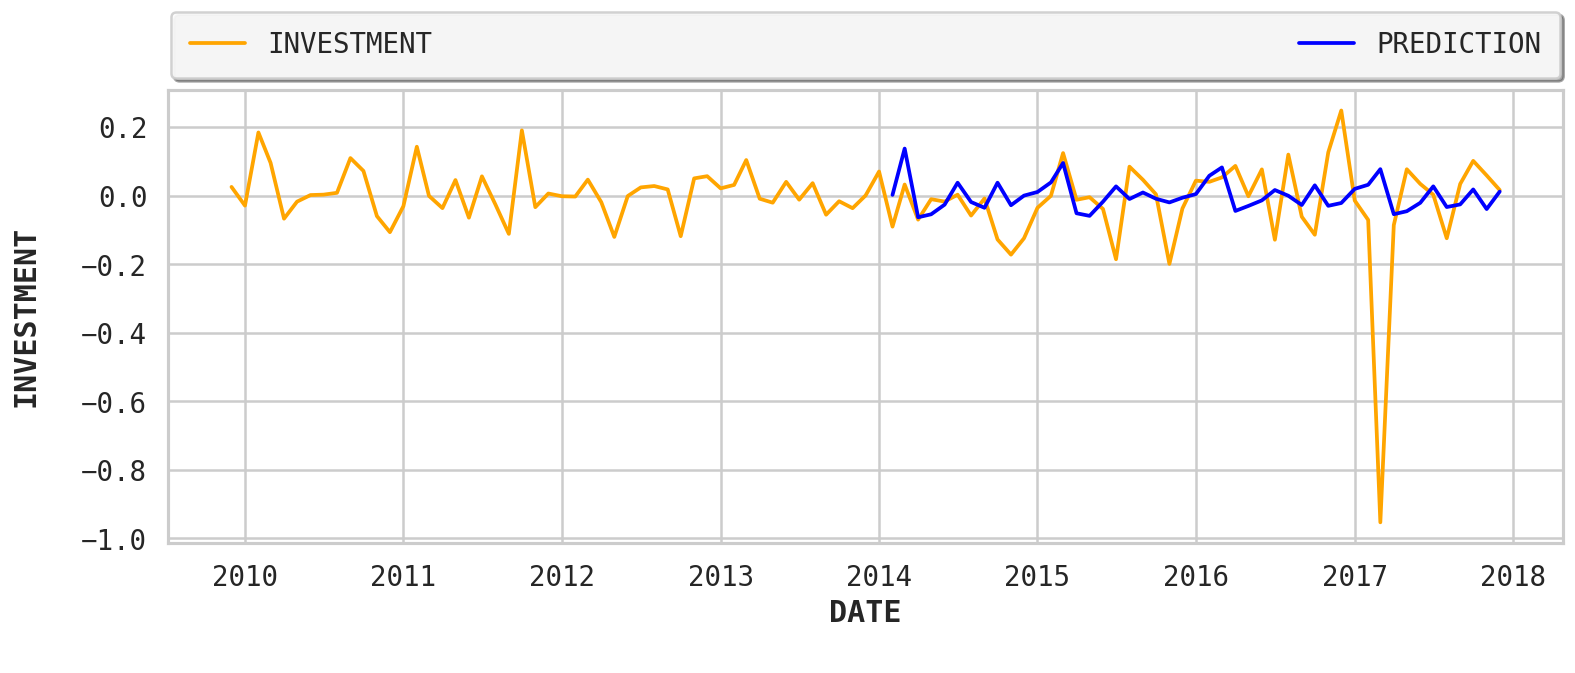

In [22]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='Date',y='Oil Investments',data=df_Oil,label="INVESTMENT",color='orange')
l2=sns.lineplot(x='Date',y='forecast',data=df_Oil,label="PREDICTION",color='blue')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()

#### FORECASTING FOR NEXT 4 YEARS THAT IS 2018 TO 2021

In [23]:
df_Oil.set_index('Date', inplace=True)

In [24]:
future_dates=[df_Oil.index[-1]+ DateOffset(months=x)for x in range(0,49)]

In [25]:
future=pd.DataFrame(index=future_dates[1:],columns=df_Oil.columns)
future.head()

,Oil Investments,forecast
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN


In [26]:
oil=pd.concat([df_Oil,future])
oil.reset_index(inplace=True)

oil['forecast'] = results.predict(start = 97, end = 144, dynamic= True)  
oil.head()

,index,Oil Investments,forecast
0,2009-12-01,0.025417,NaN
1,2010-01-01,-0.029126,NaN
2,2010-02-01,0.184326,NaN
3,2010-03-01,0.095769,NaN
4,2010-04-01,-0.067218,NaN


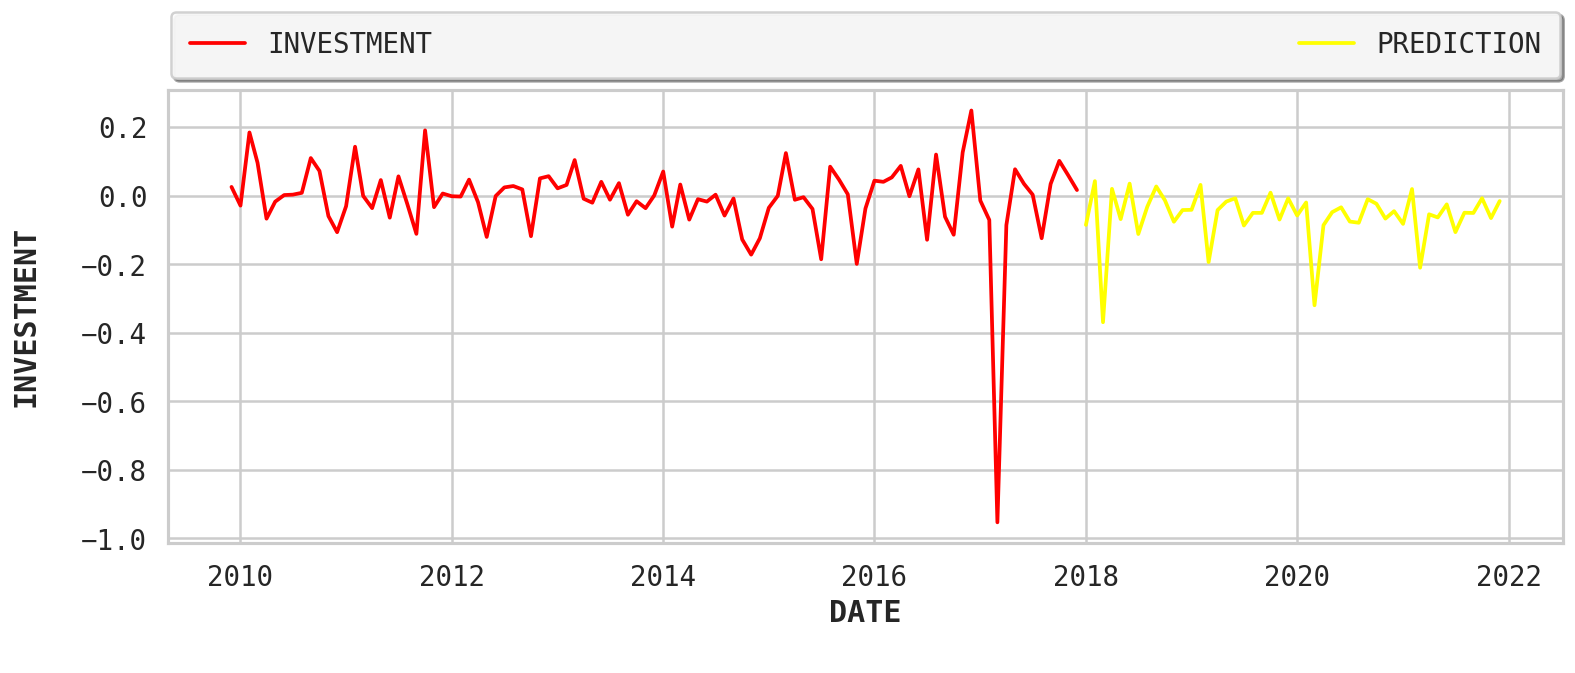

In [27]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='index',y='Oil Investments',data=oil,label="INVESTMENT",color='red')
l2=sns.lineplot(x='index',y='forecast',data=oil,label="PREDICTION",color='yellow')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()

# Here we are going to predict the stock and investment of the company in 'GOLD INVESTMENTS'

In [28]:
df_Gold=df[['Date','Gold Investments']]
df_Gold.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [29]:
df_Gold.set_index('Date', inplace=True)
#clubbing the data which will show the oil investment per month as at some index 
df_Gold=df_Gold.resample('MS').sum()

In [30]:
df_Gold.reset_index(inplace=True)
df_Gold.head()

,Date,Gold Investments
0,2009-12-01,0.000150
1,2010-01-01,-0.021293
2,2010-02-01,0.039871
3,2010-03-01,-0.979387
4,2010-04-01,0.013550


In [31]:
df_Gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              97 non-null     datetime64[ns]
 1   Gold Investments  97 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [32]:
df_Gold.describe()

,Gold Investments
count,97.000000
mean,-0.412178
std,0.663386
min,-2.121005
25%,-0.980604
50%,-0.020737
75%,0.015882
max,0.114236


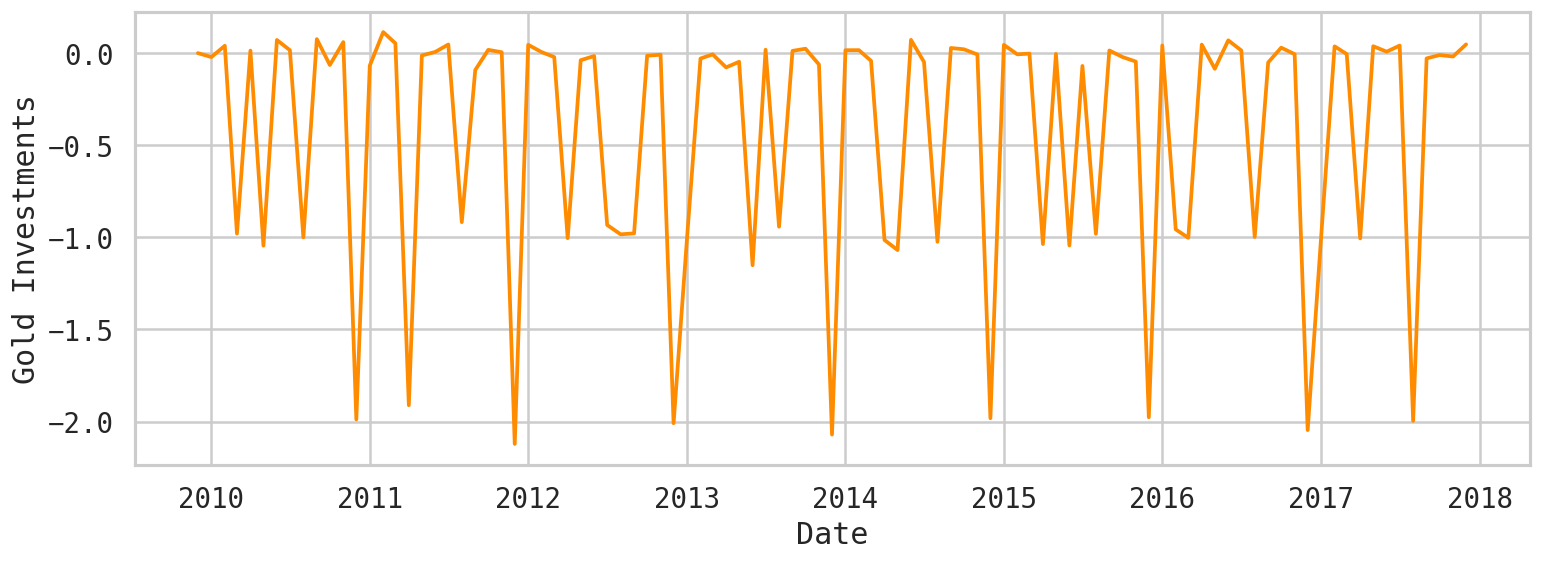

In [33]:
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(15,5),dpi=120)
sns.lineplot(x='Date',y='Gold Investments',data=df_Gold,dashes=True,markers='2',estimator=None,ci=55,err_style='band',color='darkorange')
plt.show()

In [34]:
#Gold Investments
adfuller_test(df_Gold['Gold Investments'])

ADF Test Statistic : -3.933355451321878
p-value : 0.0018026315511013927
#Lags Used : 11
Number of Observations Used : 85
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


##### Here p value is higher than 0.05 which lead to drooping null hypothesis

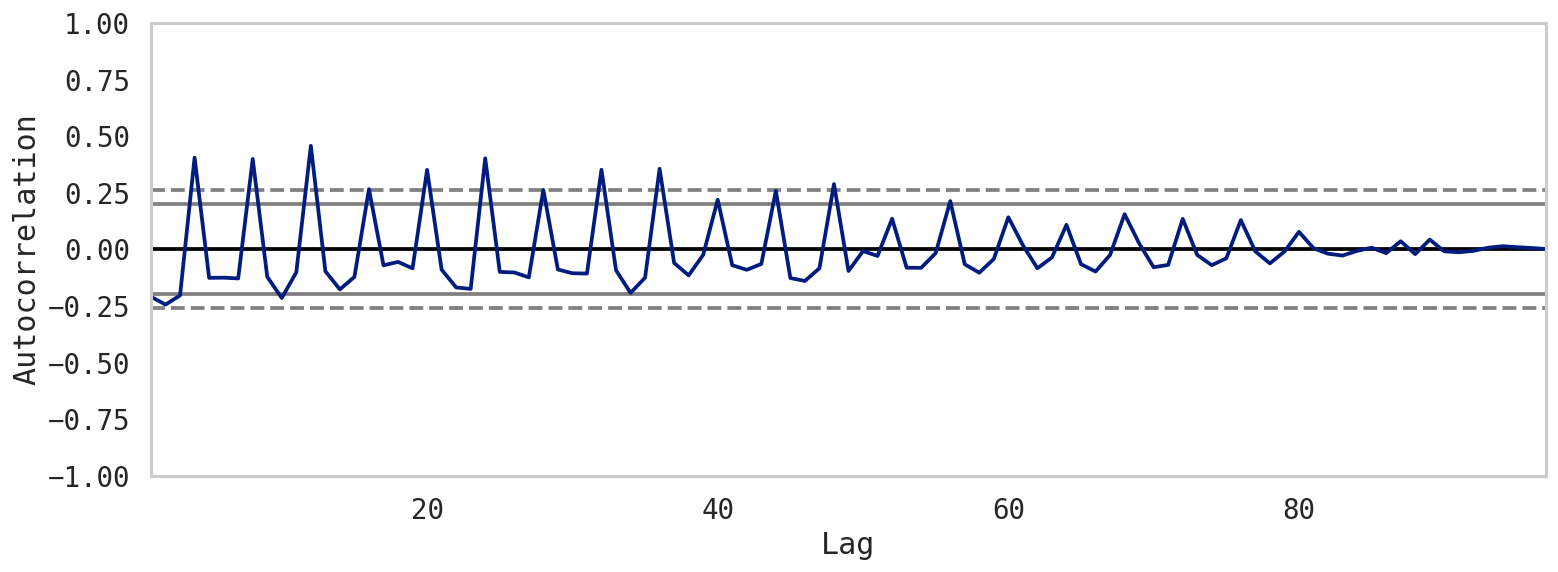

In [35]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
autocorrelation_plot(df_Gold['Gold Investments'])
plt.show()

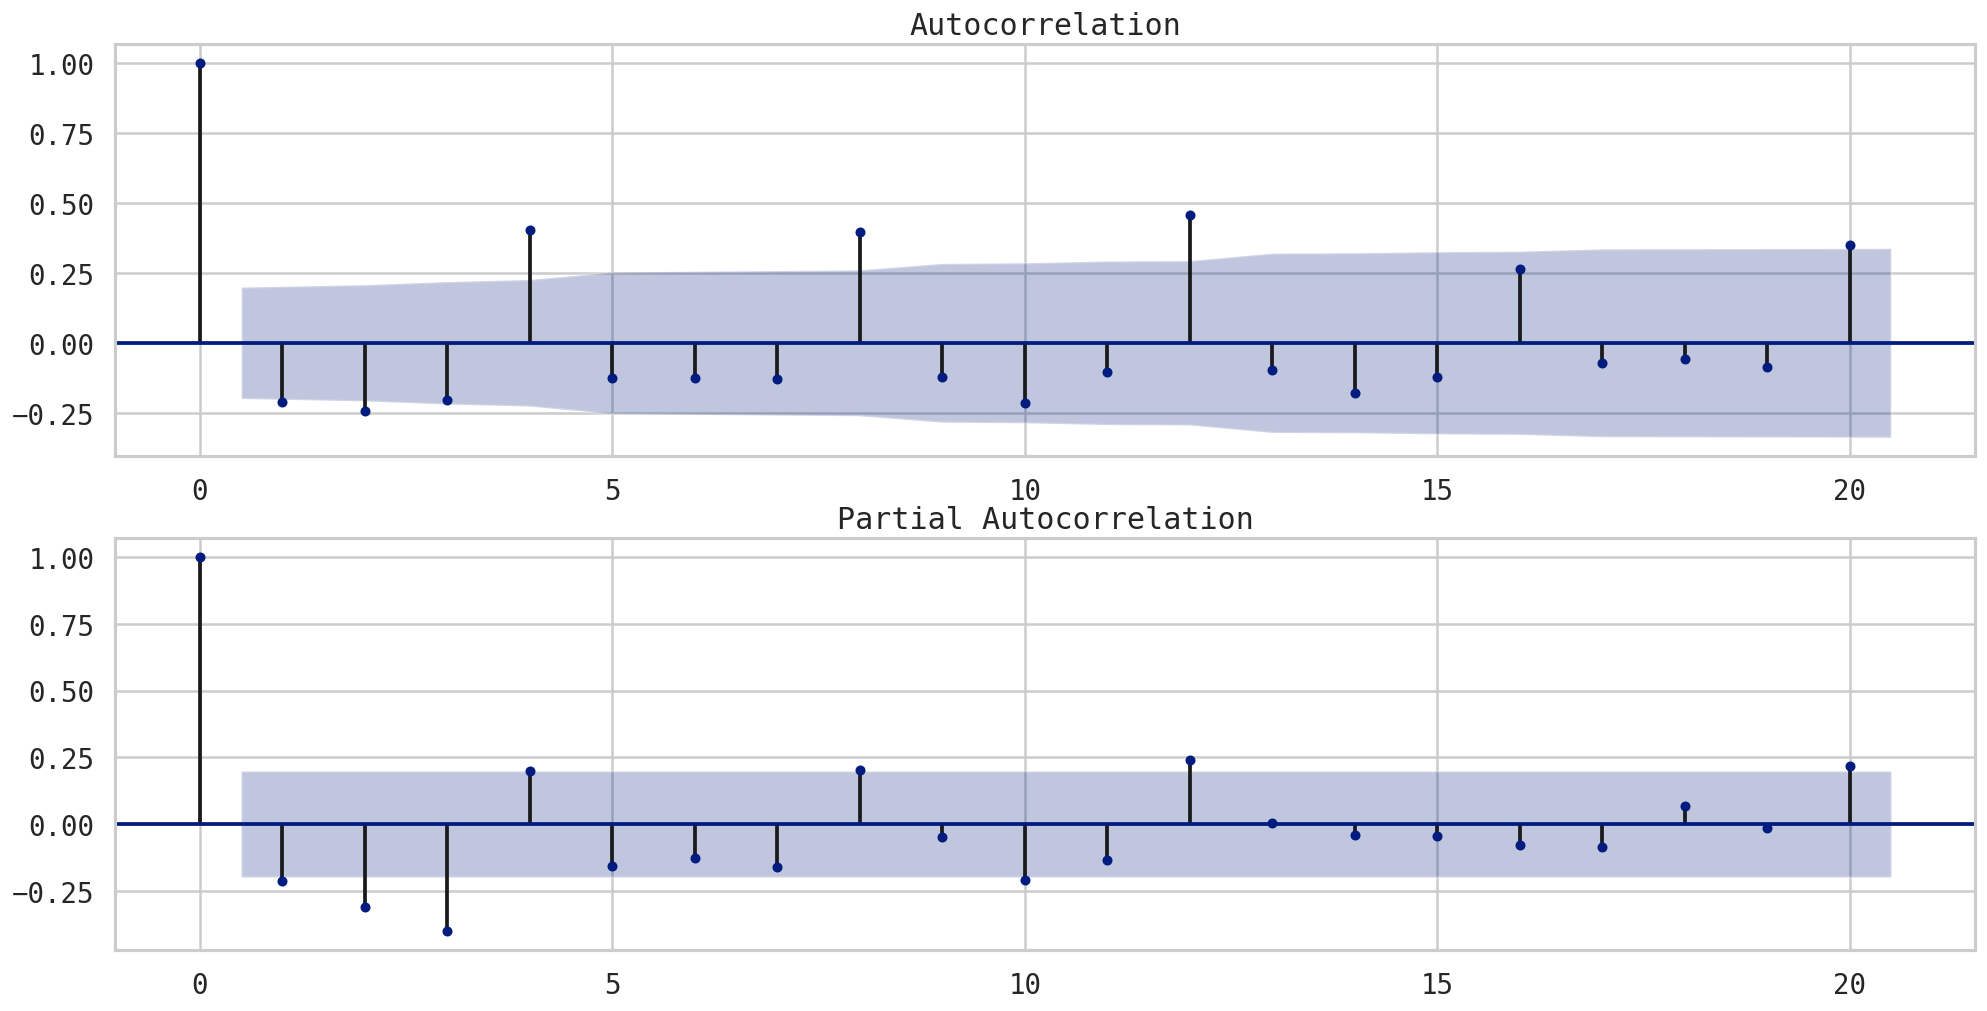

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig=plt.figure(figsize=(20,10),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_Gold['Gold Investments'],lags=20,ax=ax1)   #to determine AR value
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(df_Gold['Gold Investments'],lags=20,ax=ax2) # to determine MA value
plt.tight_layout
plt.show()

In [37]:
model=sm.tsa.statespace.SARIMAX(df_Gold['Gold Investments'],order=(5,1,8),seasonal_order=(5,1,8,12))
results=model.fit()

In [38]:
df_Gold['forecast']=results.predict(start=50,end=97,dynamic=True)
df_Gold

,Date,Gold Investments,forecast
0,2009-12-01,0.000150,NaN
1,2010-01-01,-0.021293,NaN
2,2010-02-01,0.039871,NaN
3,2010-03-01,-0.979387,NaN
4,2010-04-01,0.013550,NaN
...,...,...,...
92,2017-08-01,-1.996136,-1.261767
93,2017-09-01,-0.028615,-0.420522
94,2017-10-01,-0.010211,-0.079706
95,2017-11-01,-0.018359,-0.273084


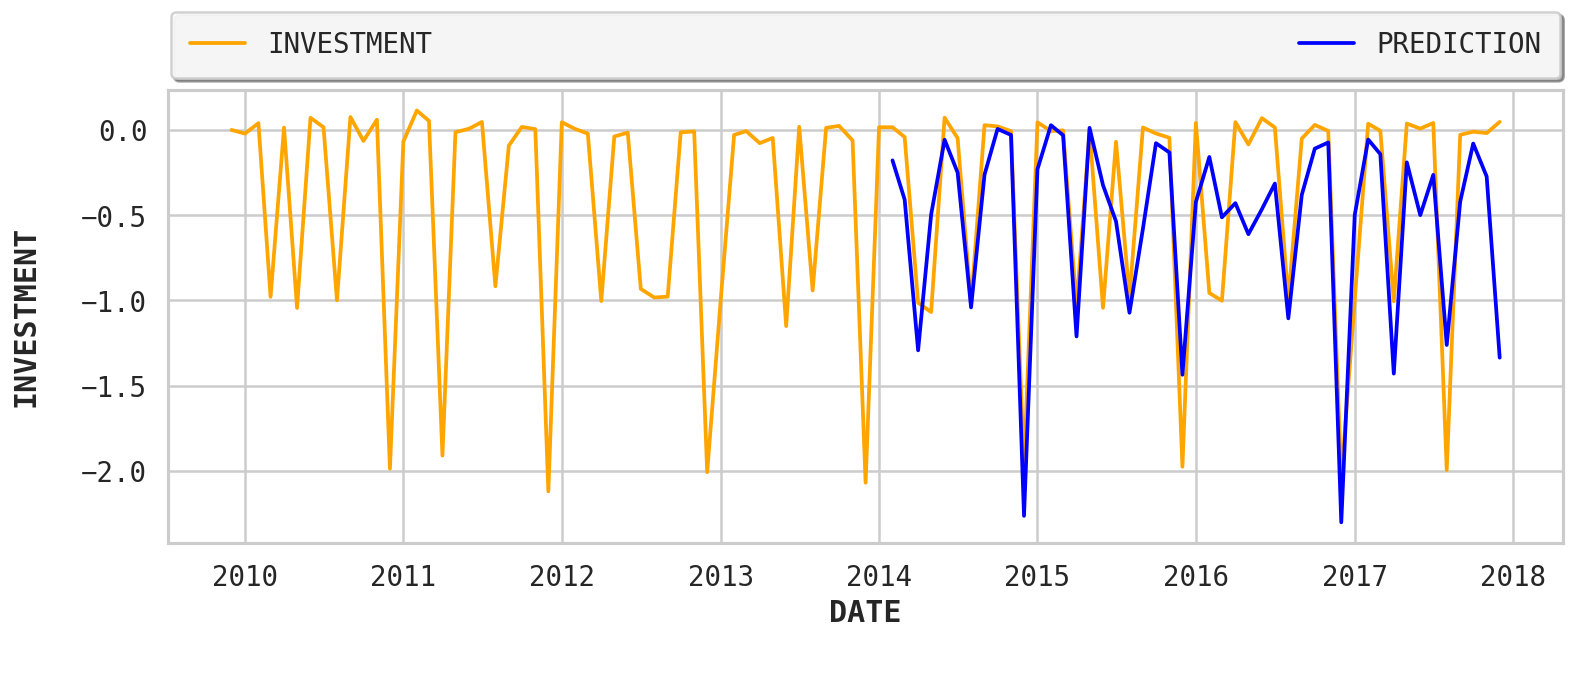

In [39]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='Date',y='Gold Investments',data=df_Gold,label="INVESTMENT",color='orange')
l2=sns.lineplot(x='Date',y='forecast',data=df_Gold,label="PREDICTION",color='blue')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()

##### FORECASTING FOR NEXT 4 YEARS THAT IS 2018 TO 2021

In [40]:
df_Gold.set_index('Date', inplace=True)

In [41]:
future_dates=[df_Gold.index[-1]+ DateOffset(months=x)for x in range(0,49)]

In [42]:
future=pd.DataFrame(index=future_dates[1:],columns=df_Gold.columns)
future.head()

,Gold Investments,forecast
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN


In [43]:
gold=pd.concat([df_Gold,future])
gold.reset_index(inplace=True)

gold['forecast'] = results.predict(start = 97, end = 144, dynamic= True)  
gold.head()

,index,Gold Investments,forecast
0,2009-12-01,0.000150,NaN
1,2010-01-01,-0.021293,NaN
2,2010-02-01,0.039871,NaN
3,2010-03-01,-0.979387,NaN
4,2010-04-01,0.013550,NaN


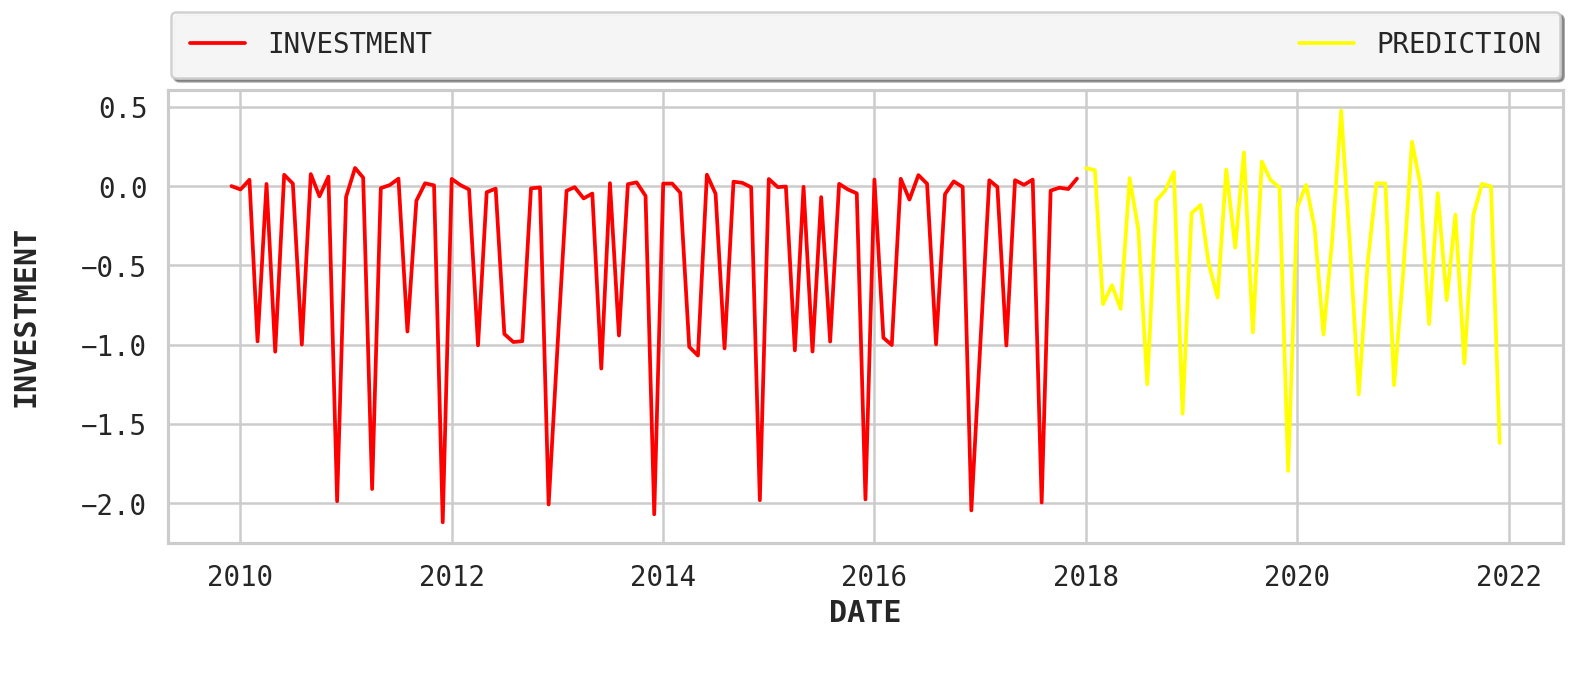

In [44]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='index',y='Gold Investments',data=gold,label="INVESTMENT",color='red')
l2=sns.lineplot(x='index',y='forecast',data=gold,label="PREDICTION",color='yellow')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()

### Here we are going to predict the stock and investment of the company in 'Comp Stock'¶

In [45]:
df_Comp=df[['Date','Comp Stock']]
df_Comp.head()

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-04-01,0.015565
2,2010-05-01,0.001729
3,2010-06-01,-0.015906
4,2010-07-01,-0.001849


In [46]:
df_Comp.set_index('Date', inplace=True)
#clubbing the data which will show the oil investment per month as at some index 
df_Comp=df_Comp.resample('MS').sum()

In [47]:
df_Comp.reset_index(inplace=True)
df_Comp.head()

,Date,Comp Stock
0,2009-12-01,0.017354
1,2010-01-01,0.021966
2,2010-02-01,0.080202
3,2010-03-01,0.108993
4,2010-04-01,0.016247


In [48]:
df_Comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        97 non-null     datetime64[ns]
 1   Comp Stock  97 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [49]:
df_Comp.describe()

,Comp Stock
count,97.000000
mean,0.020601
std,0.060339
min,-0.146489
25%,-0.018938
50%,0.020474
75%,0.061902
max,0.161785


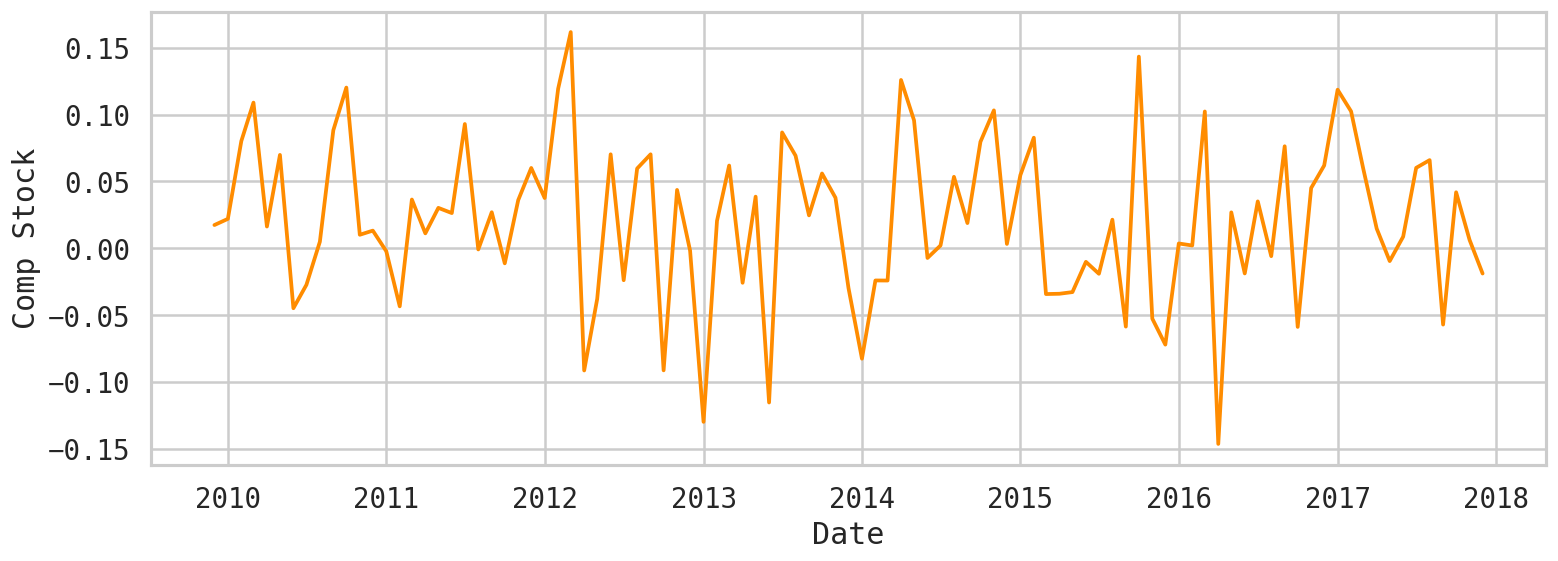

In [50]:
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(15,5),dpi=120)
sns.lineplot(x='Date',y='Comp Stock',data=df_Comp,dashes=True,markers='2',estimator=None,ci=55,err_style='band',color='darkorange')
plt.show()

In [51]:
#Oil Investments
adfuller_test(df_Comp['Comp Stock'])

ADF Test Statistic : -9.792480490591311
p-value : 6.299650878517246e-17
#Lags Used : 0
Number of Observations Used : 96
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


##### Here p value is higher than 0.05 which lead to drooping null hypothesis

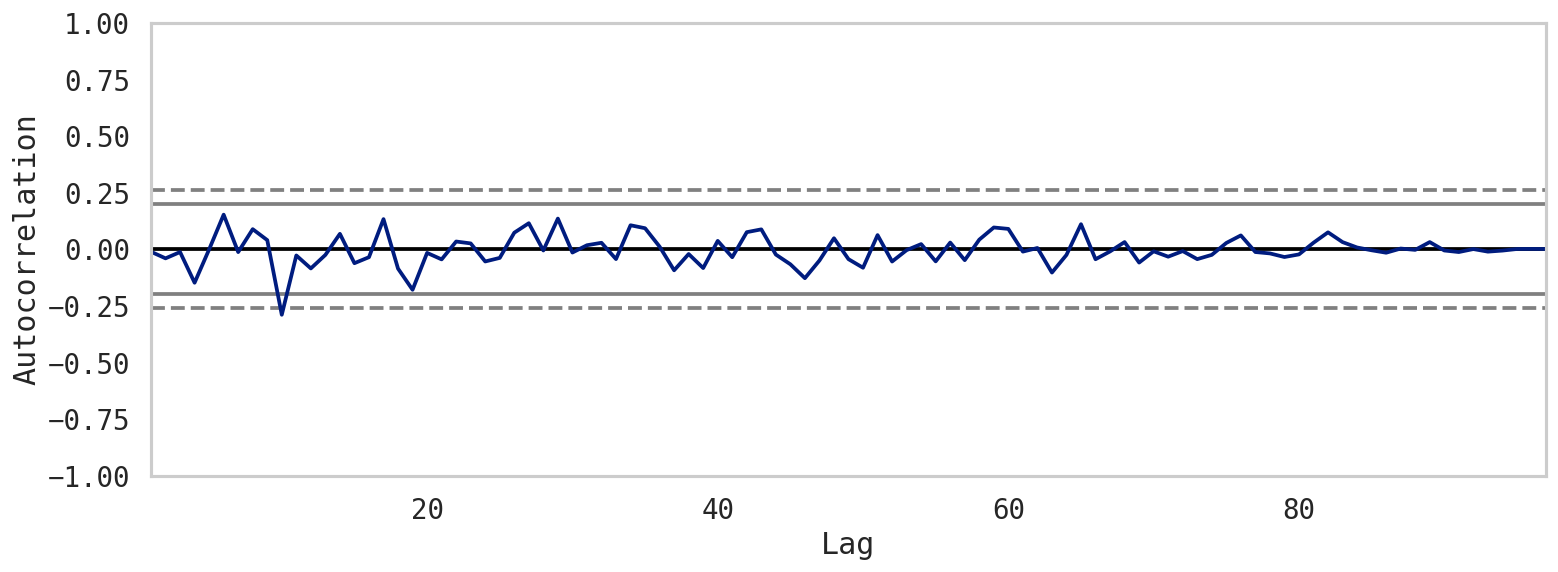

In [52]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
autocorrelation_plot(df_Comp['Comp Stock'])
plt.show()

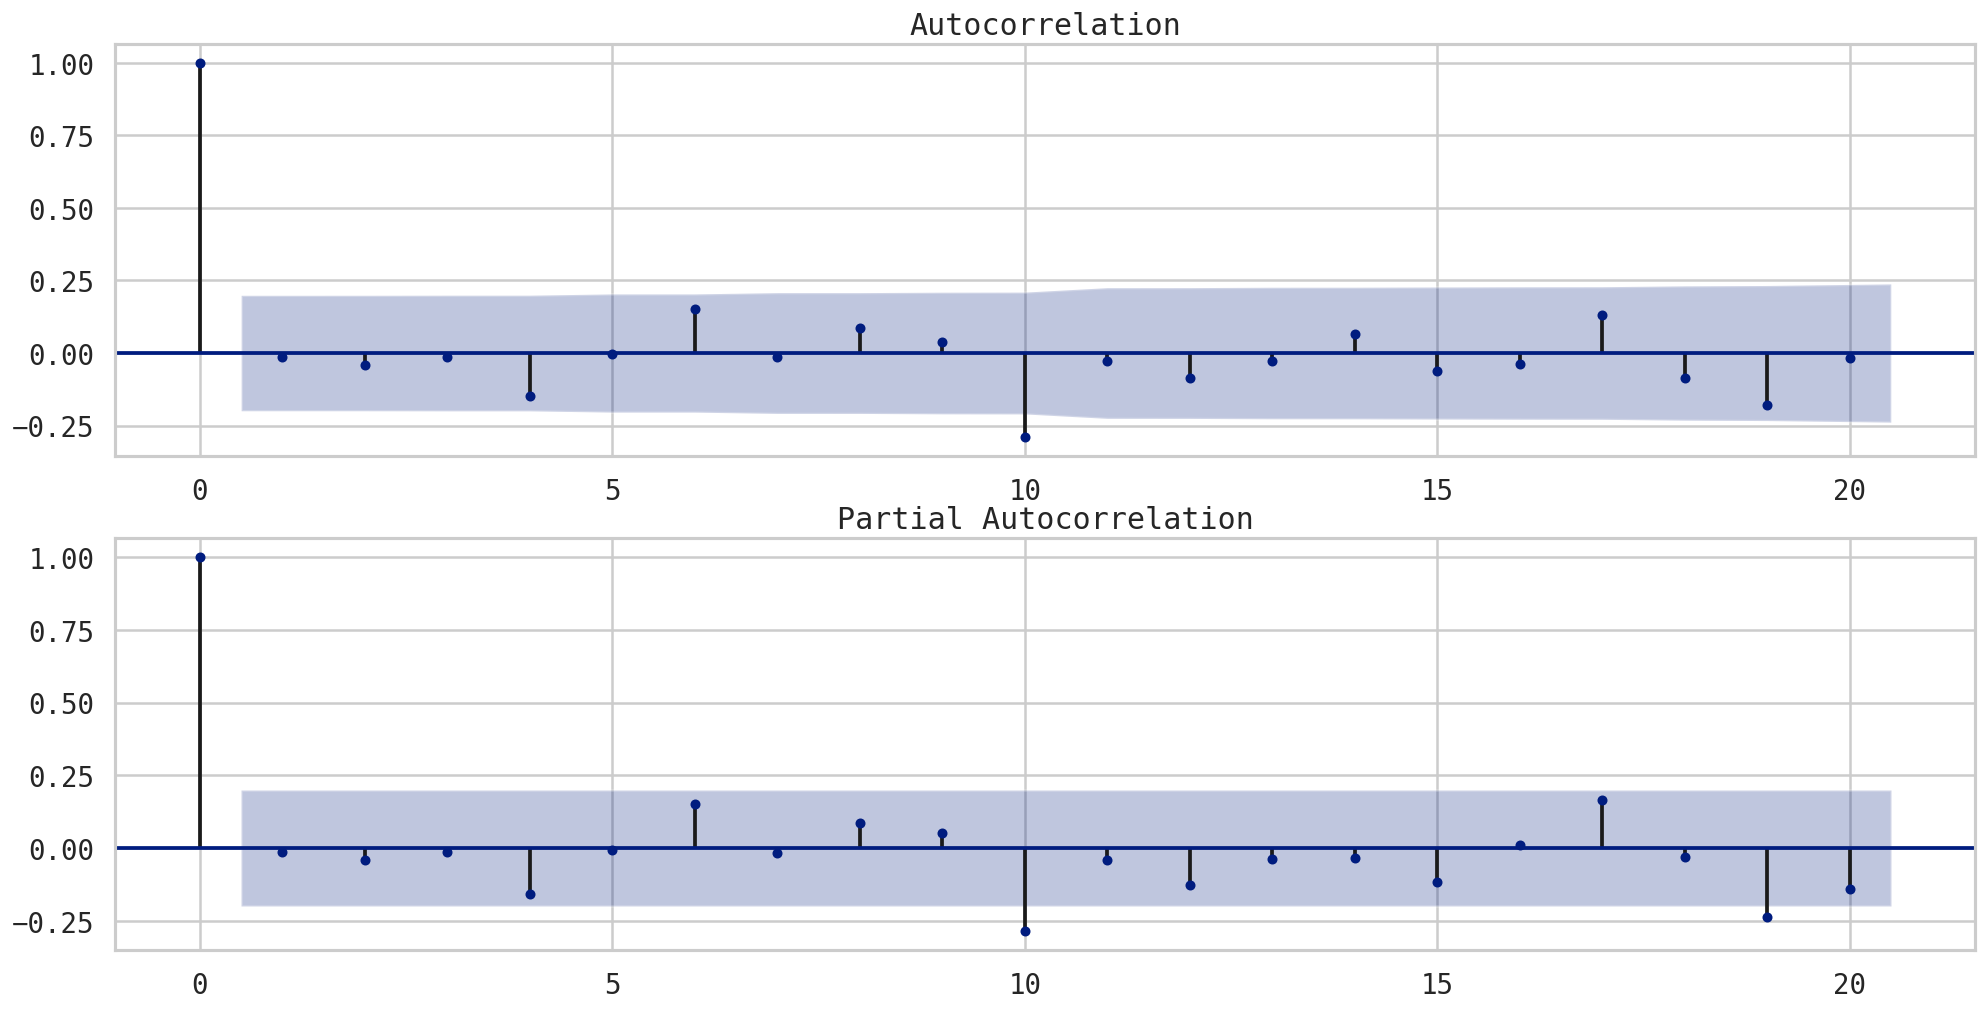

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig=plt.figure(figsize=(20,10),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_Comp['Comp Stock'],lags=20,ax=ax1)   #to determine AR value
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(df_Comp['Comp Stock'],lags=20,ax=ax2) # to determine MA value
plt.tight_layout
plt.show()

In [54]:
model=sm.tsa.statespace.SARIMAX(df_Comp['Comp Stock'],order=(5,1,8),seasonal_order=(5,1,8,12))
results=model.fit()

In [55]:
df_Comp['forecast']=results.predict(start=50,end=97,dynamic=True)
df_Comp

,Date,Comp Stock,forecast
0,2009-12-01,0.017354,NaN
1,2010-01-01,0.021966,NaN
2,2010-02-01,0.080202,NaN
3,2010-03-01,0.108993,NaN
4,2010-04-01,0.016247,NaN
...,...,...,...
92,2017-08-01,0.065951,-0.004224
93,2017-09-01,-0.057154,-0.005975
94,2017-10-01,0.041893,-0.108070
95,2017-11-01,0.006212,-0.008488


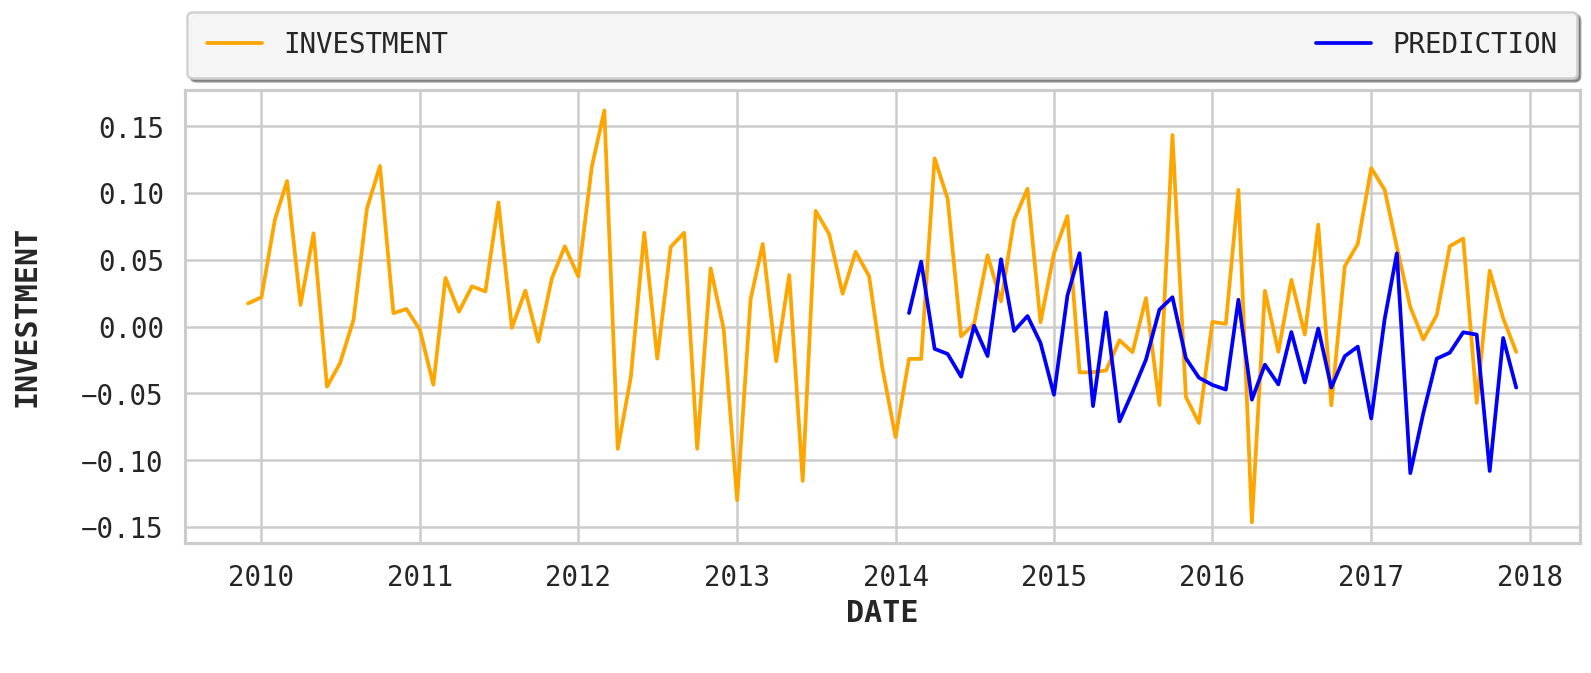

In [56]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='Date',y='Comp Stock',data=df_Comp,label="INVESTMENT",color='orange')
l2=sns.lineplot(x='Date',y='forecast',data=df_Comp,label="PREDICTION",color='blue')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()

##### FORECASTING FOR NEXT 4 YEARS THAT IS 2018 TO 2021

In [57]:
df_Comp.set_index('Date', inplace=True)

In [58]:
future_dates=[df_Comp.index[-1]+ DateOffset(months=x)for x in range(0,49)]

In [59]:
future=pd.DataFrame(index=future_dates[1:],columns=df_Comp.columns)
future.head()

,Comp Stock,forecast
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN


In [60]:
comp=pd.concat([df_Comp,future])
comp.reset_index(inplace=True)

comp['forecast'] = results.predict(start = 97, end = 144, dynamic= True)  
comp.head()

,index,Comp Stock,forecast
0,2009-12-01,0.017354,NaN
1,2010-01-01,0.021966,NaN
2,2010-02-01,0.080202,NaN
3,2010-03-01,0.108993,NaN
4,2010-04-01,0.016247,NaN


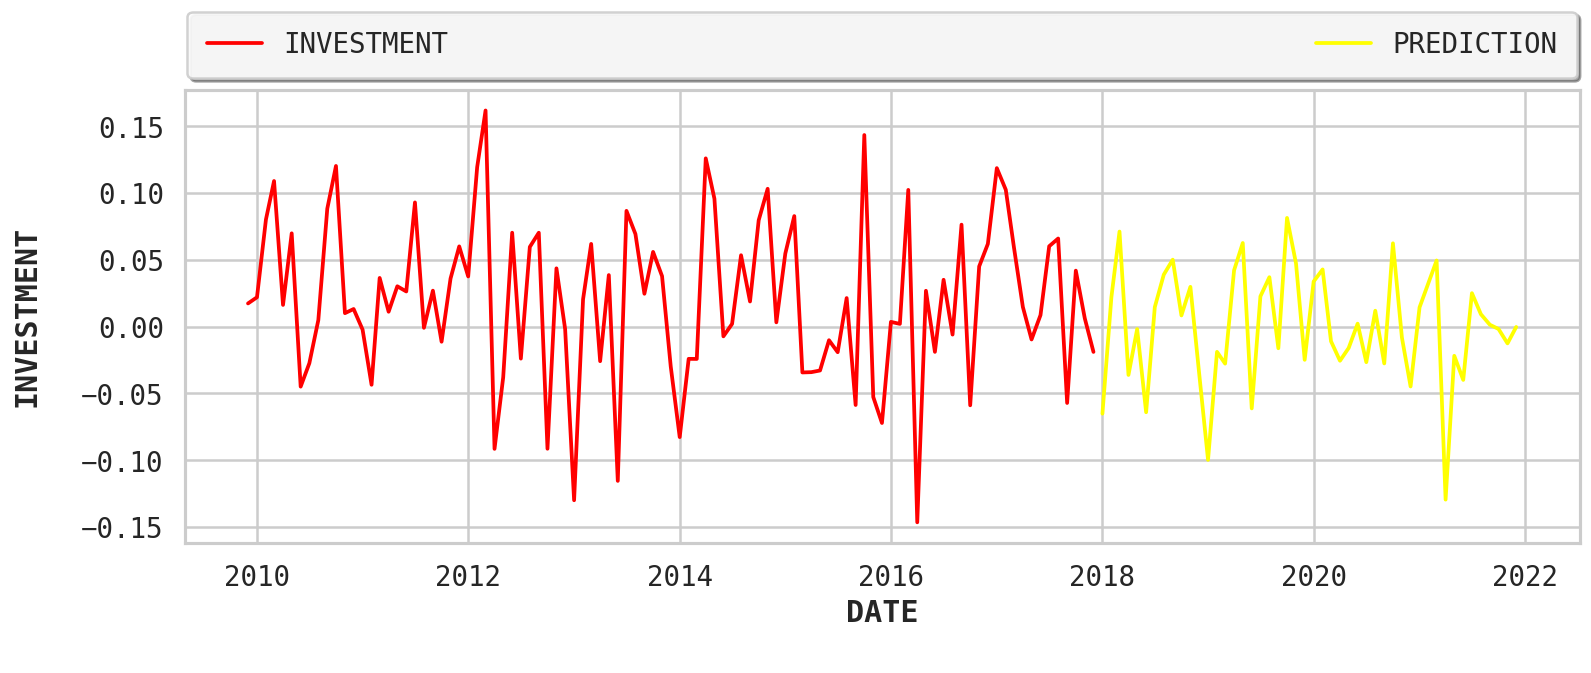

In [61]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='index',y='Comp Stock',data=comp,label="INVESTMENT",color='red')
l2=sns.lineplot(x='index',y='forecast',data=comp,label="PREDICTION",color='yellow')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()